### IMPORT LIBRARIES AND DATA

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

%matplotlib

import warnings
warnings.filterwarnings('ignore')

Using matplotlib backend: MacOSX


In [2]:
movies_df = pd.read_csv("movies_df_clean_w_genre_dummy.csv")
movies_df = movies_df.drop(['Unnamed: 0'], axis=1)

In [3]:
# Rename columns to remove spaces and fix typos
movies_df = movies_df.rename(index=str, columns={"Science Fiction": "Science_Fiction", "num_distributers": "num_distributors"})

In [4]:
# Subset dataframe to model regression

df = pd.DataFrame()
df['rating'] = movies_df['imdb_rating']
df['runtime'] = movies_df['runtime']
df['num_cast'] = movies_df['num_cast']
df['num_directors'] = movies_df['num_directors']
df['num_writers'] = movies_df['num_writers']
df['num_producers'] = movies_df['num_producers']
df['num_productionmanagers'] = movies_df['num_productionmanagers']
df['num_stunts'] = movies_df['num_stunts']
df['num_productioncompanies'] = movies_df['num_productioncompanies']
df['num_distributors'] = movies_df['num_distributors']
df['budget'] = movies_df['budget']
df['release_month'] = movies_df['release_month']
df['Action'] = movies_df['Action']
df['Adventure'] = movies_df['Adventure']
df['Animation'] = movies_df['Animation']
df['Comedy'] = movies_df['Comedy']
df['Crime'] = movies_df['Crime']
df['Drama'] = movies_df['Drama']
df['Family'] = movies_df['Family']
df['Fantasy'] = movies_df['Fantasy']
df['History'] = movies_df['History']
df['Horror'] = movies_df['Horror']
df['Music'] = movies_df['Music']
df['Mystery'] = movies_df['Mystery']
df['Romance'] = movies_df['Romance']
df['Science_Fiction'] = movies_df['Science_Fiction']
df['Thriller'] = movies_df['Thriller']
df['War'] = movies_df['War']
df['Western'] = movies_df['Western']

### EXPLORATORY DATA ANALYSIS

In [29]:
movies_df.describe()

,runtime,num_cast,num_directors,num_writers,num_producers,num_productionmanagers,num_stunts,num_productioncompanies,num_distributors,imdb_rating,...,Fantasy,History,Horror,Music,Mystery,Romance,Science_Fiction,Thriller,War,Western
count,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,...,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.00000,461.000000,461.000000
mean,116.062907,90.867679,1.075922,2.924078,11.344902,10.160521,49.221258,4.735358,22.279826,6.821692,...,0.147505,0.054230,0.114967,0.015184,0.123644,0.099783,0.219089,0.32321,0.036876,0.019523
std,17.033929,55.574567,0.281080,2.083237,5.107573,22.574328,47.323021,2.370889,15.173984,0.853641,...,0.354994,0.226717,0.319329,0.122419,0.329533,0.300036,0.414078,0.46821,0.188663,0.138504
min,81.000000,3.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,2.100000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,102.000000,51.000000,1.000000,2.000000,8.000000,3.000000,13.000000,3.000000,6.000000,6.300000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,115.000000,80.000000,1.000000,2.000000,10.000000,5.000000,33.000000,4.000000,23.000000,6.900000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
75%,127.000000,120.000000,1.000000,4.000000,14.000000,10.000000,71.000000,6.000000,33.000000,7.400000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000
max,188.000000,354.000000,3.000000,19.000000,41.000000,275.000000,247.000000,21.000000,65.000000,8.700000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [28]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 461 entries, 0 to 460
Data columns (total 33 columns):
imdb_id                    461 non-null object
genre                      461 non-null object
runtime                    461 non-null int64
release_date               461 non-null object
num_cast                   461 non-null int64
num_directors              461 non-null int64
num_writers                461 non-null int64
num_producers              461 non-null int64
num_productionmanagers     461 non-null int64
num_stunts                 461 non-null int64
num_productioncompanies    461 non-null int64
num_distributors           461 non-null int64
imdb_rating                461 non-null float64
budget                     461 non-null int64
release_month              461 non-null int64
genres                     461 non-null object
Action                     461 non-null int64
Adventure                  461 non-null int64
Animation                  461 non-null int64
Comedy              

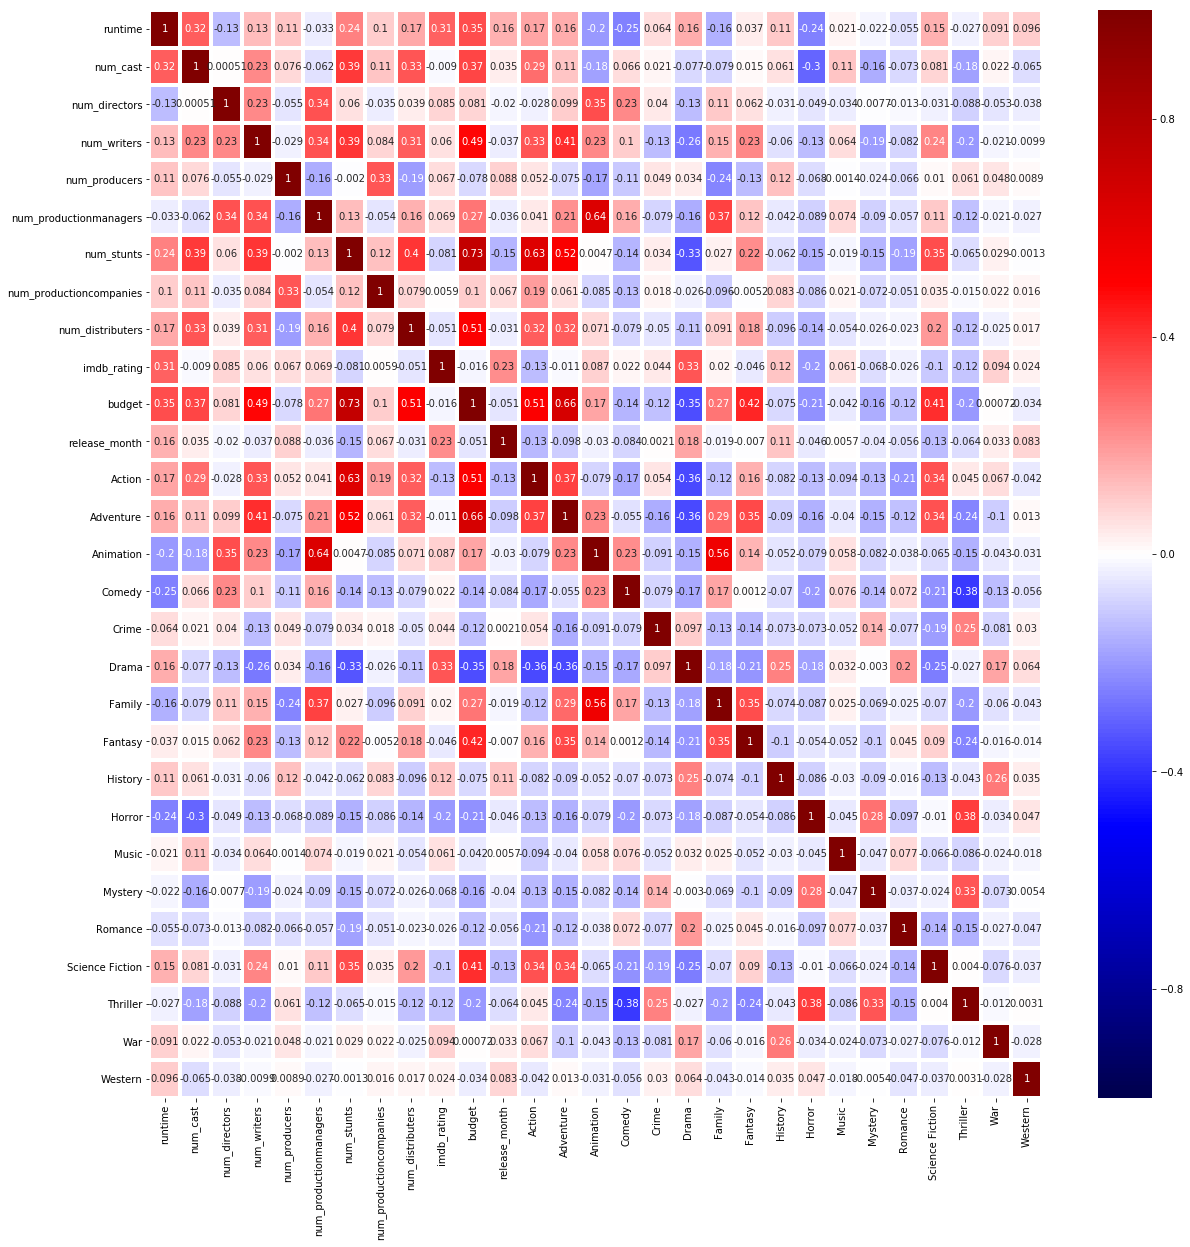

In [22]:
fig,ax = plt.subplots(figsize=(20,20)) 
sns.heatmap(movies_df.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1, linewidths= 3.0, ax=ax);

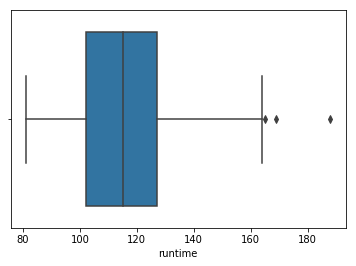

In [44]:
sns.boxplot(x=df['runtime'])

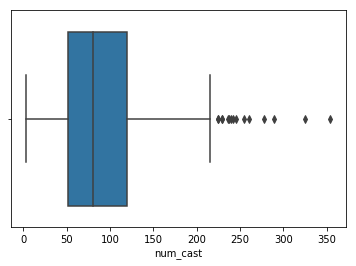

In [45]:
sns.boxplot(x=df['num_cast'])

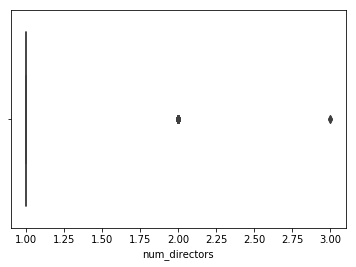

In [46]:
sns.boxplot(x=df['num_directors'])

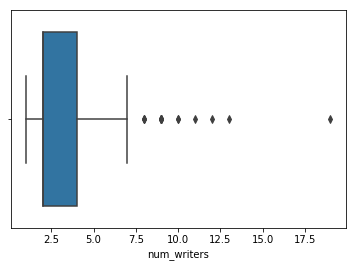

In [47]:
sns.boxplot(x=df['num_writers'])

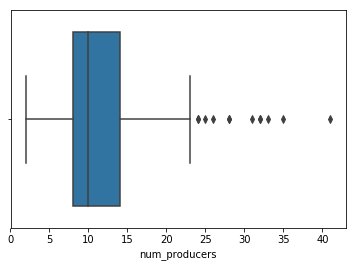

In [48]:
sns.boxplot(x=df['num_producers'])

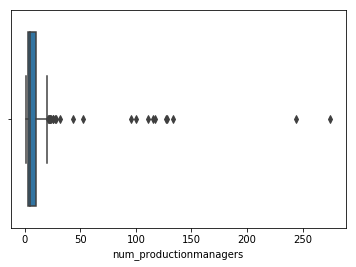

In [49]:
sns.boxplot(x=df['num_productionmanagers'])

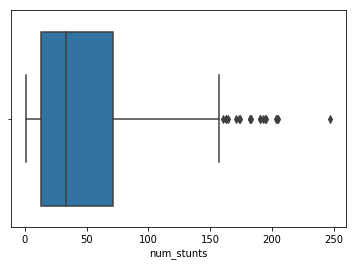

In [50]:
sns.boxplot(x=df['num_stunts'])

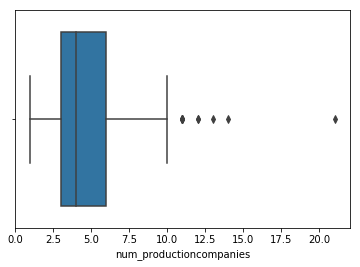

In [51]:
sns.boxplot(x=df['num_productioncompanies'])

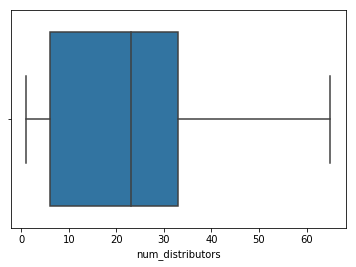

In [52]:
sns.boxplot(x=df['num_distributors'])

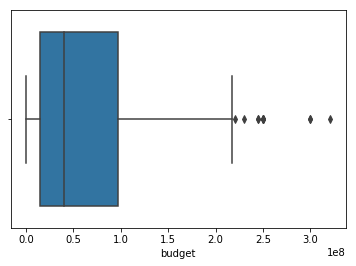

In [53]:
sns.boxplot(x=df['budget'])

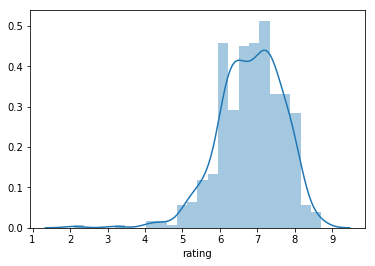

In [92]:
sns.distplot(df['rating'])

In [98]:
list(df.columns.values)

['rating',
 'runtime',
 'num_cast',
 'num_directors',
 'num_writers',
 'num_producers',
 'num_productionmanagers',
 'num_stunts',
 'num_productioncompanies',
 'num_distributors',
 'budget',
 'release_month',
 'Action',
 'Adventure',
 'Animation',
 'Comedy',
 'Crime',
 'Drama',
 'Family',
 'Fantasy',
 'History',
 'Horror',
 'Music',
 'Mystery',
 'Romance',
 'Science_Fiction',
 'Thriller',
 'War',
 'Western']

### MODELING WITH STATSMODELS

In [40]:
# Shuffle df
df = df.sample(frac=1).reset_index(drop=True)

In [41]:
# Create your feature matrix (X) and target vector (y)
y, X = patsy.dmatrices('rating ~ runtime + num_directors + num_writers + num_producers + num_productionmanagers + num_stunts + num_productioncompanies + num_distributors + budget +  release_month + Action +Adventure + Animation +Comedy +Crime +Drama +Family +Fantasy + History +Horror +Music +Mystery +Romance +Science_Fiction +Thriller +War +Western', data=df, return_type="dataframe")

# Create your model
model = sm.OLS(y, X)

# Fit your model to your training set
fit = model.fit()

# Print summary statistics of the model's performance
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 rating   R-squared:                       0.274
Model:                            OLS   Adj. R-squared:                  0.229
Method:                 Least Squares   F-statistic:                     6.049
Date:                Thu, 24 Jan 2019   Prob (F-statistic):           1.18e-17
Time:                        20:14:13   Log-Likelihood:                -506.91
No. Observations:                 461   AIC:                             1070.
Df Residuals:                     433   BIC:                             1186.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   4.3139      0.364     11.845      0.000       3.598       5.030
runtime                     0.0150      0.003      5.854      0.000       0.010       0.020
num_directors               0.2736      0.142      1.928      0.054      -0.005       0.552
num_writers                 0.0319      0.021      1.507      0.133      -0.010       0.073
num_producers               0.0064      0.008      0.827      0.408      -0.009       0.022
num_productionmanagers     -0.0003      0.002     -0.162      0.872      -0.005       0.004
num_stunts                 -0.0007      0.001     -0.514      0.608      -0.003       0.002
num_productioncompanies    -0.0046      0.016     -0.282      0.778      -0.036       0.027
num_distributors           -0.0036      0.003     -1.270      0.205      -0.009       0.002
budget                  -5.867e-10   1.17e-09     -0.502      0.616   -2.89e-09    1.71e-09
release_month               0.0308      0.011      2.783      0.006       0.009       0.053
Action                     -0.0476      0.106     -0.449      0.654      -0.256       0.161
Adventure                   0.1398      0.111      1.258      0.209      -0.079       0.358
Animation                   0.4537      0.258      1.755      0.080      -0.054       0.962
Comedy                      0.1293      0.101      1.276      0.203      -0.070       0.329
Crime                       0.0543      0.111      0.487      0.626      -0.165       0.273
Drama                       0.5202      0.095      5.479      0.000       0.334       0.707
Family                      0.0918      0.174      0.526      0.599      -0.251       0.435
Fantasy                    -0.0498      0.118     -0.422      0.673      -0.282       0.182
History                    -0.0516      0.168     -0.306      0.759      -0.383       0.279
Horror                     -0.0782      0.137     -0.571      0.569      -0.348       0.191
Music                       0.1797      0.295      0.609      0.543      -0.400       0.759
Mystery                    -0.0391      0.118     -0.330      0.741      -0.271       0.193
Romance                    -0.2136      0.126     -1.694      0.091      -0.461       0.034
Science_Fiction            -0.0456      0.104     -0.438      0.661      -0.250       0.159
Thriller                   -0.0481      0.098     -0.494      0.622      -0.240       0.144
War                         0.1689      0.200      0.844      0.399      -0.224       0.562
Western                    -0.1620      0.258     -0.628      0.530      -0.669       0.345
==============================================================================
Omnibus:                      149.744   Durbin-Watson:                   1.846
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              84

### MODELING WITH SKLEARN

#### RUNNING LINEAR AND RIDGE MODELS WITH CROSS VALIDATION

CROSS VALIDATING LINEAR AND RIDGE MODELS

In [6]:
selected_columns = ['runtime','num_cast','num_directors','num_writers','num_producers','num_productionmanagers','num_stunts','num_productioncompanies','num_distributors','budget','release_month','Action','Adventure','Animation','Comedy','Crime','Drama','Family','Fantasy','History','Horror','Music','Mystery','Romance','Science_Fiction','Thriller','War','Western']

In [7]:
X, y = df.drop('rating',axis=1), df['rating']

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=.25, random_state=43)

In [44]:
X, y = np.array(X), np.array(y)
kf = KFold(n_splits=10, shuffle=True, random_state = 7)
cv_lm_r2s, cv_lm_reg_r2s = [], [] #collect the validation results for both models

for train_ind, val_ind in kf.split(X,y):
    
    X_train, y_train = X[train_ind], y[train_ind]
    X_val, y_val = X[val_ind], y[val_ind] 
    
    #simple linear regression
    lm = LinearRegression()
    lm_reg = Ridge(alpha=1)

    lm.fit(X_train, y_train)
    cv_lm_r2s.append(lm.score(X_val, y_val))
    
    #ridge with feature scaling
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    
    lm_reg.fit(X_train_scaled, y_train)
    cv_lm_reg_r2s.append(lm_reg.score(X_val_scaled, y_val))

print('Simple regression scores: ', cv_lm_r2s)
print('Ridge scores: ', cv_lm_reg_r2s, '\n')

print(f'Simple mean cv r^2: {np.mean(cv_lm_r2s):.3f} +- {np.std(cv_lm_r2s):.3f}')
print(f'Ridge mean cv r^2: {np.mean(cv_lm_reg_r2s):.3f} +- {np.std(cv_lm_reg_r2s):.3f}')

Simple regression scores:  [0.22652761097343233, 0.16801160758722514, 0.2575175960501481, 0.11279264346991924, 0.15765327365852289, -9.790057411529496e-05, 0.3907290302495341, 0.19612371125022698, 0.037986889381043554, 0.23181908016355535]
Ridge scores:  [0.2271727511891487, 0.16819397277955028, 0.2576717608392769, 0.11360995986115996, 0.15801284604936483, 0.0007145688838917641, 0.39057331591013666, 0.19633036681364102, 0.038621955893442195, 0.23202492155420826] 

Simple mean cv r^2: 0.178 +- 0.106
Ridge mean cv r^2: 0.178 +- 0.106


In [45]:
# RMSE FOR LINEAR REGRESSION
y_pred = lm.predict(X_test.loc[:,selected_columns])
y_true = np.asarray(y_test)
mse = mean_squared_error(y_true, y_pred)
rmse = mse**(.5)

rmse

0.7349881569438932

MODELING RIDGE MODEL TO TEST SET

In [46]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test)

lm_reg = Ridge(alpha=1)
lm_reg.fit(X_scaled,y)
print(f'Ridge Regression test R^2: {lm_reg.score(X_test_scaled, y_test):.3f}')

Ridge Regression test R^2: 0.299


In [47]:
alpha_array = np.arange(0.001, 1.00, 0.001)

hyper_param_grid = {'alpha':alpha_array}

ridge_model = GridSearchCV(Ridge(), hyper_param_grid, cv=5, n_jobs = 1, scoring = "neg_mean_squared_error")

ridge_model.fit(X_test,y_test);

In [48]:
# RMSE FOR RIDGE REGRESSION
y_pred = ridge_model.predict(X_test.loc[:,selected_columns])
y_true = np.asarray(y_test)
mse = mean_squared_error(y_true, y_pred)
rmse = mse**(.5)

rmse

0.6603553070881156

#### LASSO REGULARIZATION

USING GRIDSEARCHCV TO FIND BEST REGULARIZATION STRENGTH WHILE CROSS VALIDATING WITH KFOLDS

In [8]:
alpha_array = np.arange(0.001, 1.00, 0.001)

hyper_param_grid = {'alpha':alpha_array}

lasso_model = GridSearchCV(Lasso(), hyper_param_grid, cv=5, n_jobs = 1, scoring = "neg_mean_squared_error")

lasso_model.fit(X_train,y_train);

In [24]:
print(lasso_model.best_estimator_,'\n\n')
coef_list = list(zip(X, lasso_model.best_estimator_.coef_,))

for coef in coef_list:
    print(coef)

Lasso(alpha=0.014000000000000002, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False) 


('runtime', 0.011656018253074298)
('num_cast', -0.0013010899305325849)
('num_directors', 0.009133359023848667)
('num_writers', 0.037202137422952516)
('num_producers', 0.015096102413722105)
('num_productionmanagers', 0.007755442984699018)
('num_stunts', -0.0004132584264301691)
('num_productioncompanies', -0.006831654190770252)
('num_distributors', -0.0031463543802545983)
('budget', -1.661770096951341e-10)
('release_month', 0.05395974594647436)
('Action', -0.11436303327875277)
('Adventure', 0.0)
('Animation', 0.0)
('Comedy', 0.18208468851411178)
('Crime', 0.08819598899385472)
('Drama', 0.4054569192590379)
('Family', 0.0)
('Fantasy', -0.0)
('History', 0.0)
('Horror', -0.059549721360746745)
('Music', 0.0)
('Mystery', -0.0)
('Romance', -0.17592536562627714)
('Science_Fiction', -0.0)


In [35]:
print(lasso_model.best_estimator_.score(X_train, y_train))
print(lasso_model.best_estimator_.score(X_val, y_val))

0.28387281725686697
0.10276117302619225


In [9]:
print(lasso_model.best_estimator_.score(X_test, y_test))

0.24896822541935093


### Finding Root Mean Square Error

In [10]:
y_pred = lasso_model.predict(X_test.loc[:,selected_columns])

In [11]:
y_true = np.asarray(y_test)

In [12]:
mse = mean_squared_error(y_true, y_pred)
mse

0.4748927868279679

In [13]:
rmse = mse**(.5)

rmse

0.6891246526050043

### Predicting upcoming movies using LASSO model

In [ ]:
recs = pd.read_csv("recs.csv")

In [120]:
ratings_predict = lasso_model.predict(recs)

In [121]:
ratings_predict

array([7.12247483, 6.37876051, 7.51893694])